# Práctica 6a: medidas de distancia para el análisis de clustering en R

La clasificación no supervisada de las observaciones en grupos, requiere algunos métodos para calcular la distancia o la (des)similitud entre cada par de observaciones. El resultado de este cálculo se conoce como matriz de disimilitud o distancia.

El cálculo de la distancia se define como la similitud ( n-espacial) entre dos elementos (x,y), la forma de medir esta similitud e influirá drásticamente en la forma de los clústers.

Otras medidas de similitud son las distancias basadas en la correlación, que se utilizan ampliamente para el análisis de datos en el área genética (dónde las características son en mayor número que las observaciones).** La distancia basada en la correlación se define restando el coeficiente de correlación de la unidad 1**. Se pueden utilizar diferentes tipos de métodos de correlación, como la distancia de correlación de Pearson o correlación paramétrica, ya que depende de la distribución de los datos (x¯)

La distancia basada en la correlación considera que dos objetos son similares si sus características están altamente correlacionadas, aunque los valores observados puedan estar muy alejados en términos de distancia euclidiana. **La distancia entre dos objetos es 0 cuando están perfectamente correlacionados**. La correlación de Pearson es bastante sensible a los valores atípicos. Esto no importa cuando se agrupan las muestras, porque la correlación se da en miles de genes. Cuando se agrupan genes, es importante ser consciente del posible impacto de los valores atípicos. Esto puede ser mitigado usando la correlación de Spearman en lugar de la de Pearson.

## Cálculo de la matriz de distancia
### Preparación de los datos
Para realizar un análisis de clustering en R, generalmente, los datos deben prepararse de la siguiente manera:

    1.Las filas son observaciones y las columnas son variables
    2.Cualquier valor que falte en los datos debe ser eliminado o estimado (rellenar o imputar).
    3.Los datos deben estar estandarizados (es decir, escalados) para que las variables sean comparables.

In [15]:
df <- read.csv("comprar_alquilar.csv")

In [16]:
#Vemos la estrutura de nuestra base de datos
str(df)

'data.frame':	202 obs. of  10 variables:
 $ ingresos      : int  6000 6745 6455 7098 6167 5692 6830 6470 6251 6987 ...
 $ gastos_comunes: int  1000 944 1033 1278 863 911 1298 1035 1250 1258 ...
 $ pago_coche    : int  0 123 98 15 223 11 345 39 209 252 ...
 $ gastos_otros  : int  600 429 795 254 520 325 309 782 571 245 ...
 $ ahorros       : int  50000 43240 57463 54506 41512 50875 46761 57439 50503 40611 ...
 $ vivienda      : int  400000 636897 321779 660933 348932 360863 429812 606291 291010 324098 ...
 $ estado_civil  : int  0 1 2 0 0 1 1 0 0 2 ...
 $ hijos         : int  2 3 1 0 0 4 1 0 0 1 ...
 $ trabajo       : int  2 6 8 3 3 5 5 1 3 7 ...
 $ comprar       : int  1 0 1 0 1 1 1 0 1 1 ...


In [17]:
#Eliminar cualquier valor que falte
#y que pueda estar presente en los datos con na.omit()
df <- na.omit(df)

In [18]:
#Escalamos los datos usando la funcion scale()
df <- scale(df)

In [19]:
#Vemos el dataframe
head(df,n=5)

ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0.6185918,0.1044292,-1.69474384,0.50310952,0.6478653,0.1954247,-1.22404711,0.5609799,-0.9819801,1.4159627
1.0612899,-0.1013727,-0.71027724,-0.51412351,0.2585817,1.9325688,-0.02956636,1.2920633,0.5954353,-0.7027371
0.8889644,0.2257053,-0.91037208,1.66311210,1.0776321,-0.3781628,1.16491440,-0.1701036,1.3841430,1.4159627
1.2710515,1.1260885,-1.57468694,-1.55515146,0.9073493,2.1088226,-1.22404711,-0.9011870,-0.5876263,-0.7027371
0.7178275,-0.3990504,0.09010211,0.02721103,0.1590725,-0.1790523,-1.22404711,-0.9011870,-0.5876263,1.4159627


### Subconjuntos aleatorio del conjunto de datos
Usaremos sólo un subconjunto de los datos tomando 50 observaciones aleatorias entre las 202 observaciones totales del conjunto de datos. Esto se hace usando la función sample(. Después, estandarizamos los datos utilizando la función scale()

In [21]:
set.seed(123)#Proponemos una semilla para que sea reproducible el experimento
ss <- sample(1:202,50)#Tomamos 50 observaciones
#df <- comprar_alquilar.csv[ss,]#Creamos el subconjunto
df <-read.csv("comprar_alquilar.csv")[ss,]
df.scaled <- scale(df)#Estandarizamos los valores de las características

### Calcular la distancia euclidiana
Para calcular la distancia euclídeana se puede utilizar la función dist()

In [22]:
# Otros métodos pueden ser: “euclidean”, “maximum”, “manhattan”, “canberra”, “binary”, “minkowski”.
dist.eucl <- dist(df.scaled, method = "euclidean")

Para facilitar la visualización de la información de estas distancias generadas, se puede reformatear el vector de distancia en una matriz utilizando la función **as.matrix()**

In [24]:
#Creamos subconjunto de las 3 primeras características, observaciones y valores redondeado
round(as.matrix(dist.eucl)[1:3,1:3],1)


,159,179,14
159,0.0,3.7,5.5
179,3.7,0.0,3.4
14,5.5,3.4,0.0


En esta matriz, el valor representa la distancia entre los objetos. Los valores en la diagonal de la matriz representan la distancia entre los objetos y ellos mismos (que deben ser cero)

In [28]:
library(cluster)
df <- read.csv("m_a_droga.csv")
head(df,5)

ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
14-0273,06/28/2014 12:00:00 AM,DateReported,NA,,,,,,,...,,,,,,,Accident,"CT (41.575155, -72.738288)","CT (41.575155, -72.738288)","CT (41.575155, -72.738288)"
13-0102,03/21/2013 12:00:00 AM,DateofDeath,48,Male,Black,NORWALK,,,NORWALK,...,,,,,,,Accident,"Norwalk, CT (41.11805, -73.412906)","NORWALK, CT (41.11805, -73.412906)","CT (41.575155, -72.738288)"
16-0165,03/13/2016 12:00:00 AM,DateofDeath,30,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,,,,,,Y,Accident,"Danbury, CT (41.393666, -73.451539)","SANDY HOOK, CT (41.419998, -73.282501)",
16-0208,03/31/2016 12:00:00 AM,DateofDeath,23,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,,,,,,Y,Accident,"Greenwich, CT (41.026526, -73.628549)",,
13-0052,02/13/2013 12:00:00 AM,DateofDeath,22,Male,"Asian, Other",FLUSHING,QUEENS,,GREENWICH,...,,,,,,,Accident,"Greenwich, CT (41.026526, -73.628549)",,"CT (41.575155, -72.738288)"


In [29]:
str(df)

'data.frame':	5105 obs. of  41 variables:
 $ ID                 : Factor w/ 5105 levels "12-0001","12-0002",..: 1118 457 2297 2340 407 1122 205 759 107 516 ...
 $ Date               : Factor w/ 2099 levels "","01/01/2012 00:00",..: 998 454 409 506 248 1004 1259 1791 648 755 ...
 $ DateType           : Factor w/ 3 levels "","DateofDeath",..: 3 2 2 2 2 2 2 2 2 2 ...
 $ Age                : int  NA 48 30 23 22 23 21 40 40 50 ...
 $ Sex                : Factor w/ 4 levels "","Female","Male",..: 1 3 2 3 3 3 2 2 3 3 ...
 $ Race               : Factor w/ 12 levels "","Asian Indian",..: 1 4 12 12 3 12 12 12 12 12 ...
 $ ResidenceCity      : Factor w/ 371 levels "","ALFRED STATION",..: 1 218 270 264 98 33 339 113 81 175 ...
 $ ResidenceCounty    : Factor w/ 85 levels "","AROOSTOOK",..: 1 1 23 80 63 1 29 50 29 51 ...
 $ ResidenceState     : Factor w/ 27 levels "","AL","CA","CO",..: 1 1 5 18 1 1 1 1 1 1 ...
 $ DeathCity          : Factor w/ 223 levels "","6340","AMSTON",..: 1 133 41 70 70 23 204 

In [30]:
#Eliminar cualquier valor que falte
#y que pueda estar presente en los datos con na.omit()
df <- na.omit(df)

In [32]:
#Calculamos la matriz de distancia y la ordenamos
dd <- daisy(df)
round(as.matrix(dd)[1:3,a:3],2)

ERROR: Error in eval(expr, envir, enclos): objeto 'a' no encontrado


## Visualización de matrices de distancia
Una solución sencilla para visualizar las matrices de distancia es utilizar la función fviz_dist() de la librería factoextra.

also installing the dependencies 'zip', 'SparseM', 'MatrixModels', 'sp', 'openxlsx', 'minqa', 'nloptr', 'statmod', 'RcppEigen', 'carData', 'pbkrtest', 'quantreg', 'maptools', 'rio', 'lme4', 'viridis', 'car', 'ellipse', 'flashClust', 'leaps', 'scatterplot3d', 'ggsci', 'cowplot', 'ggsignif', 'gridExtra', 'polynom', 'abind', 'dendextend', 'FactoMineR', 'ggpubr', 'ggrepel'




  There is a binary version available but the source version is later:
     binary source needs_compilation
lme4 1.1-21 1.1-23              TRUE

  Binaries will be installed
package 'zip' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'MatrixModels' successfully unpacked and MD5 sums checked
package 'sp' successfully unpacked and MD5 sums checked
package 'openxlsx' successfully unpacked and MD5 sums checked
package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'statmod' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'carData' successfully unpacked and MD5 sums checked
package 'pbkrtest' successfully unpacked and MD5 sums checked
package 'quantreg' successfully unpacked and MD5 sums checked
package 'maptools' successfully unpacked and MD5 sums checked
package 'rio' successfully unpac

Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


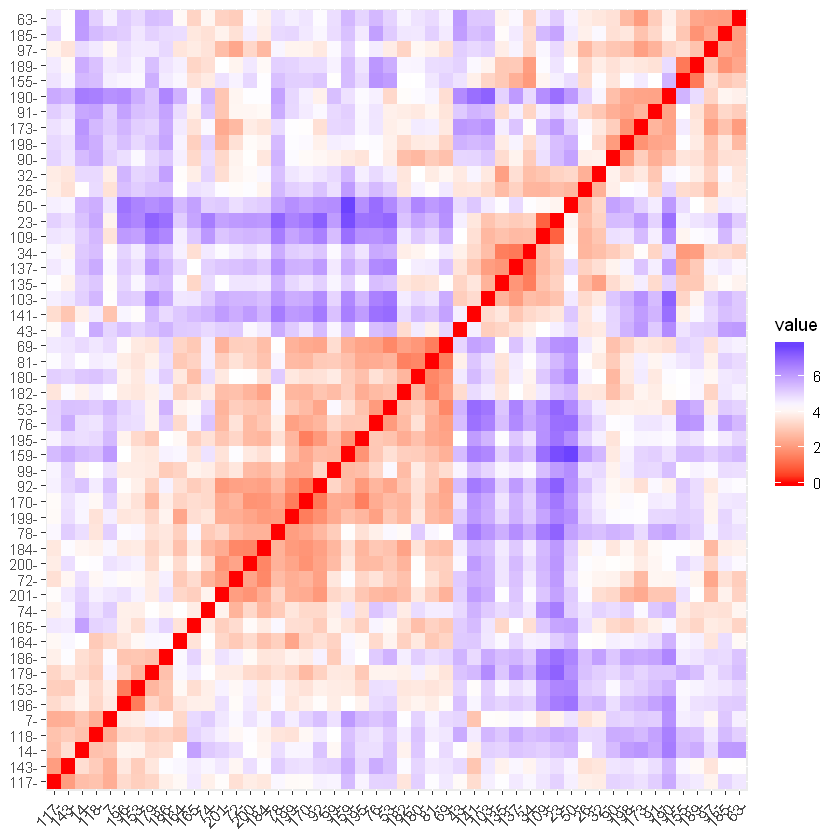

In [36]:
install.packages("factoextra")
library("factoextra") 
fviz_dist(dist.eucl)